## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Loading the Dataset

In [2]:
data_df = pd.read_csv("data/data.csv")
data_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Wrangling

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
print(f"Total number of rows in the data: {data_df.shape[0]} \ntotal number of columns in the data: {data_df.shape[1]}")

Total number of rows in the data: 205 
total number of columns in the data: 26


In [6]:
# Checking for missing values in the data
data_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

 Observation:
 - There are no null values in the dataset

In [7]:
# Checking duplicates data
data_df.duplicated().sum()

0

Observation:
- There are no duplicate values in the dataset

In [8]:
data_df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## EDA Process

In [9]:
data_df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [10]:
data_df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [11]:
# Creating a new column of car company
data_df['company'] = data_df['CarName'].apply(lambda x: x.split(' ')[0])
data_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
data_df['company'].value_counts()

company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [13]:
data_df['company'].replace("vw", "volkswagen", inplace=True)
data_df['company'].replace("maxda", "mazda", inplace=True)
data_df['company'].replace("toyouta", "toyota", inplace=True)
data_df['company'].replace("vokswagen", "volkswagen", inplace=True)
data_df['company'].replace("porcshce", "porsche", inplace=True)
data_df['company'].replace("Nissan", 'nissan', inplace=True)

In [14]:
data_df['company'].value_counts()

company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [15]:
data_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


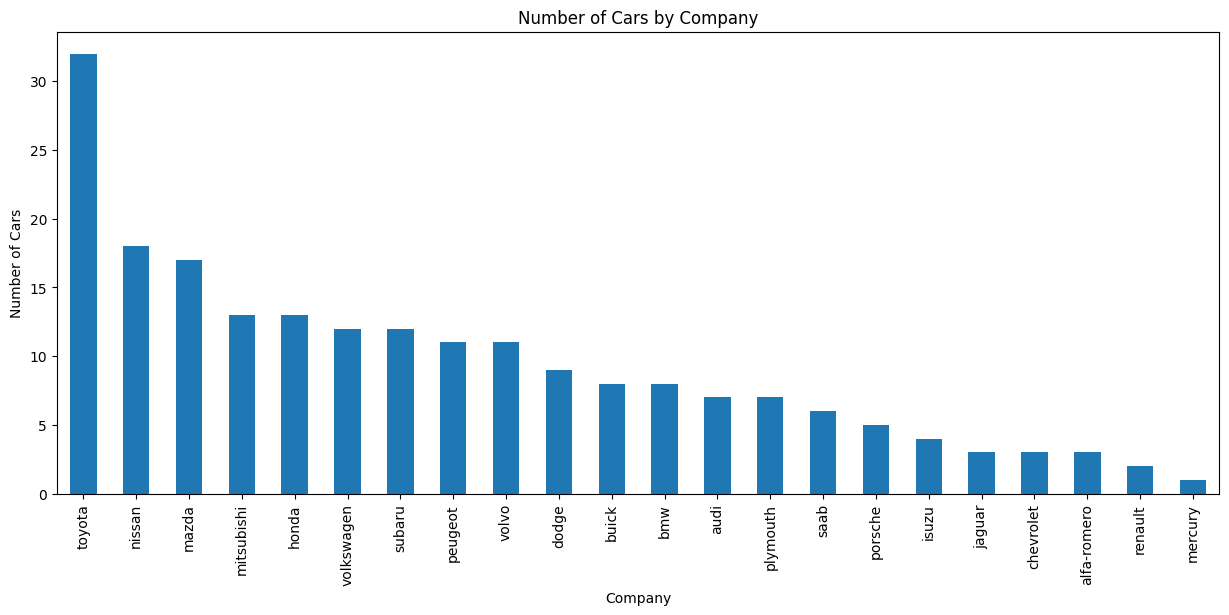

In [16]:
plt.figure(figsize=(15, 6))
data_df['company'].value_counts().plot(kind='bar')
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.show()

In [17]:
data_df.drop(columns=['car_ID', 'CarName', 'symboling'], inplace=True)

In [18]:
numerical_features = [feature for feature in data_df.columns if data_df[feature].dtype != 'O']
categorical_features = [feature for feature in data_df.columns if data_df[feature].dtype == 'O']

### Encoding Categorical Features

In [19]:
categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [20]:
data_df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
data_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [22]:
X = data_df.drop(['price'], axis=1)
y = data_df['price']

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

In [25]:
numeric_transfer = StandardScaler()
oh_transformers = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformers, categorical_features),
        ("StandardScaler", numeric_transfer, numerical_features)
    ]
)

In [26]:
X = preprocessor.fit_transform(X)

In [27]:
X

array([[ 0.        ,  1.        ,  1.        , ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.        ,  1.        ,  1.        , ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.        ,  1.        ,  1.        , ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.        ,  0.        ,  0.        , ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 0.        ,  1.        ,  0.        , ...,  0.57769233,
        -0.95301169, -0.83719538]])

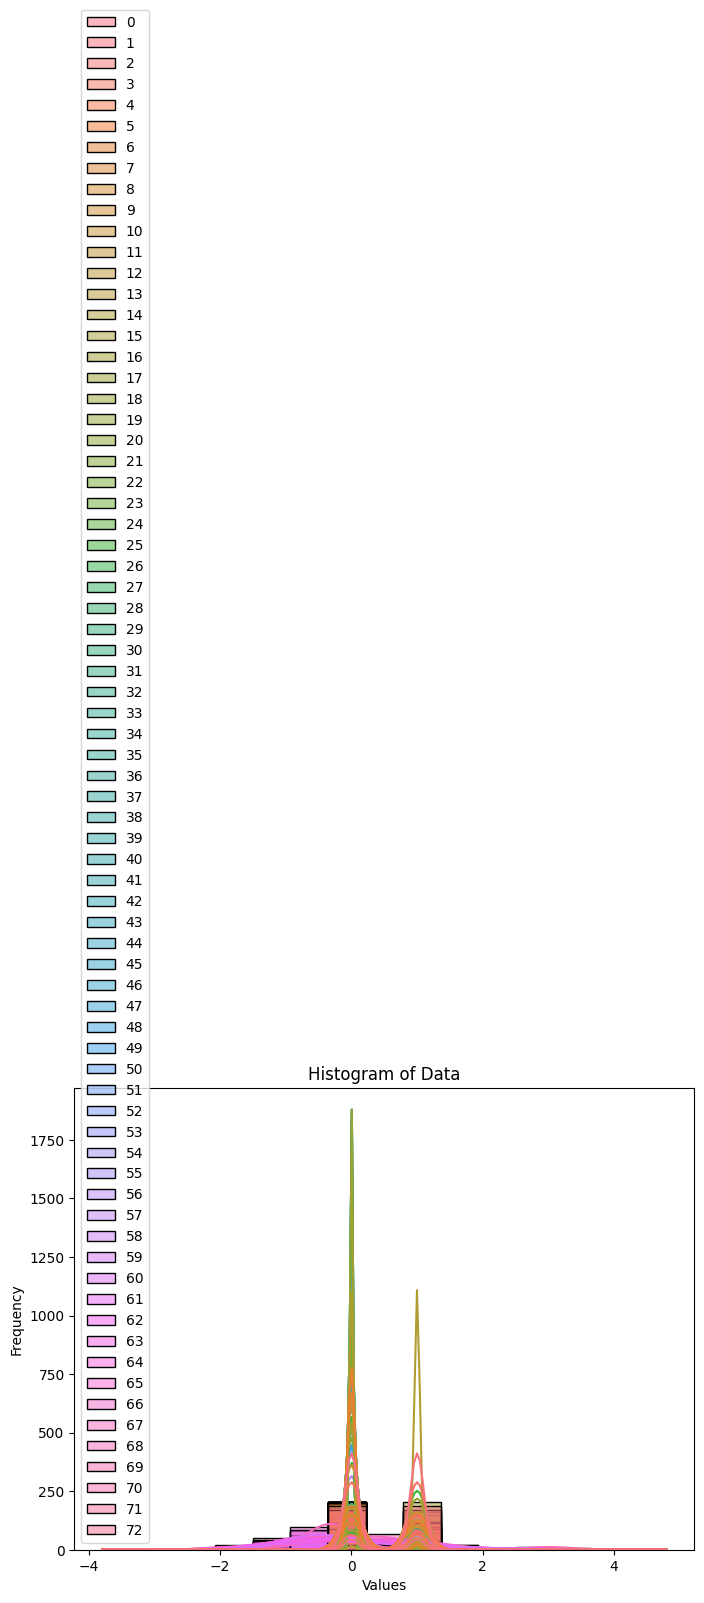

In [28]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(X, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f"Number of rows in the X_train {X_train.shape[0]}. The number of columns are {X_train.shape[1]}")
print(f"Number of rows in the X_test {X_test.shape[0]}. The number of columns are {X_test.shape[1]}")

Number of rows in the X_train 164. The number of columns are 73
Number of rows in the X_test 41. The number of columns are 73


In [31]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.8 MB/s eta 0:00:00


In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
def evaluate_model(true, predicted):
  mae = mean_absolute_error(true, predicted)
  rmse = np.sqrt(mean_squared_error(true, predicted))
  r2_square = r2_score(true, predicted)

  return mae, rmse, r2_square

In [40]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
  model = list(models.values())[i]
  # Fitting the model
  model.fit(X_train, y_train)

  # Predicting the values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Evaluate test and train dataset
  model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1232.8289
- Mean Absolute Error: 915.3537
- R2 Score: 0.9745
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2776.9370
- Mean Absolute Error: 1804.2520
- R2 Score: 0.9023


Lasso
Model performance for Training set
- Root Mean Squared Error: 1236.0588
- Mean Absolute Error: 929.9653
- R2 Score: 0.9744
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2784.2198
- Mean Absolute Error: 1803.7914
- R2 Score: 0.9018


Ridge
Model performance for Training set
- Root Mean Squared Error: 1380.7089
- Mean Absolute Error: 1044.2158
- R2 Score: 0.9680
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2759.3932
- Mean Absolute Error: 1886.2423
- R2 Score: 0.9035


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2793.0762
- Mean Absolute Error: 1684.5104
- 

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.956426
7,CatBoosting Regressor,0.939915
6,XGBRegressor,0.934195
8,AdaBoost Regressor,0.916031
4,Decision Tree,0.905621
2,Ridge,0.903549
0,Linear Regression,0.902318
1,Lasso,0.901805
3,K-Neighbors Regressor,0.717942


## Random Forest Regressor  - comes out to be the best model

In [48]:
rfr_model = RandomForestRegressor()
rfr_model = rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
rfr_score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the Random Forest Regressor model:", rfr_score)

Accuracy of the Random Forest Regressor model: 95.90601123464893


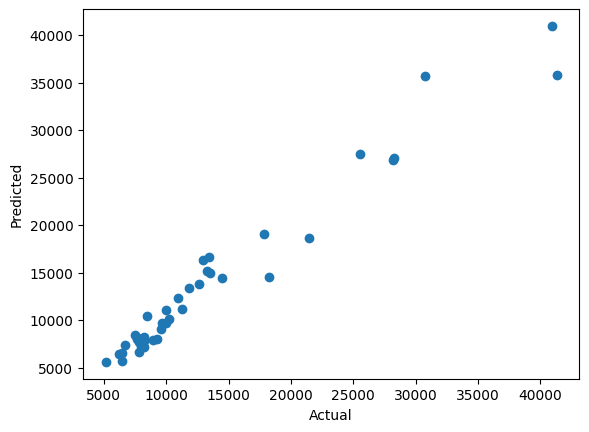

In [49]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

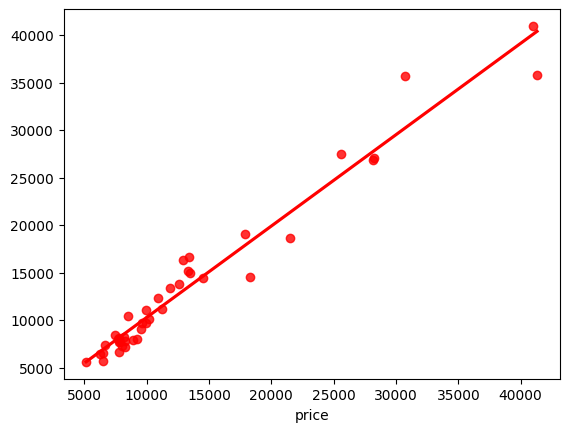

In [50]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between actual and predicted value

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,35699.415000,-4939.415000
9,17859.167,19083.060000,-1223.893000
100,9549.000,9053.380000,495.620000
132,11850.000,13369.810000,-1519.810000
68,28248.000,27017.265000,1230.735000
95,7799.000,6668.790000,1130.210000
159,7788.000,7648.140000,139.860000
162,9258.000,8001.860000,1256.140000
147,10198.000,10162.660000,35.340000
182,7775.000,8138.285000,-363.285000
